In [ ]:
from torch import nn
import torch.nn.functional as F
import numpy as np
import torchvision
import torchvision.models as models
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms.functional import crop
import cv2
import matplotlib.pyplot as plt
import time
import torch

In [ ]:
def crop_r(image):
    return crop(image, 4, 124, 124, 124)
    
def crop_l(image):
    return crop(image, 4, 4, 124, 124)  
    
transform_right = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_r),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])
transform_left = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_l),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/TUM'
batch_size = 1

train_r = datasets.ImageFolder(train_path, transform_right)
train_l = datasets.ImageFolder(train_path, transform_left)

train_loader_r = torch.utils.data.DataLoader(train_r, batch_size)
train_loader_l = torch.utils.data.DataLoader(train_l, batch_size)


In [ ]:
weights = models.ResNet101_Weights
model = models.resnet101(weights=weights)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
def rightpt(train_loader_r, min_, max_, aux_):
  for i, data in enumerate(train_loader_r):
      if i > min_:
        inputs, labels = data
        outputs = model.avgpool(model.layer4(model.layer3(model.layer2(model.layer1(model.maxpool(model.relu(model.bn1(model.conv1(inputs)))))))))
        output_.append(outputs)
        if i > max_:
          return output_


In [ ]:
def leftpt(train_loader_l, min_, max_, aux_,output_):
  for i,data in enumerate(train_loader_l):
    if i > min_:
      inputs, labels = data
      outputs = model.avgpool(model.layer4(model.layer3(model.layer2(model.layer1(model.maxpool(model.relu(model.bn1(model.conv1(inputs)))))))))
      output_[i-aux_] = torch.cat((output_[i-aux_], outputs), 1)
      if i > max_:
          return output_
           

In [ ]:
for n_it in range(1,85):
  output_ = []
  output_new = []
  try:
    if n_it == 1:
      min_ = 0
    else:
      min_ = (n_it-1)*100
    max_ = n_it*100
    aux_ = min_ +1
    output_ = rightpt(train_loader_r, min_, max_, aux_)
    output_new = leftpt(train_loader_l, min_, max_, aux_, output_)
    out_path = '/content/drive/MyDrive/Datasets/tensors_tum_resnet/tensors'+str(n_it)+'.pt'
    torch.save(output_new,out_path)
  except:
    print('error')


error


In [ ]:
def match(cam_img, db_img, dist_limit):
    distance = torch.cdist(cam_img, db_img, p=2)
    max_dist = torch.max(distance)
    if max_dist <= dist_limit:
        return True
    
    return False

In [ ]:
def belief_generation(db, descriptor):
    belief = []
    lp = 0
    for d in db:
        bg = match(descriptor, d, 0.24)
        if bg:
            belief.append(1)
        else:
            belief = []
        if len(belief) >= 3:
            print('loop')
            print(d)
            lp += 1
    return lp

In [ ]:

database = [database1,database2,database3,database4,database5,database6,database7,database8,database9,database10,
            database11,database12,database13,database14,database15,database16,database17,database18,database19,database20,
            database21,database22,database23,database24,database25,database26,database27,database28,database29,database30,
            database31,database32,database33,database34,database35,database36,database37,database38,database39,database40,
            database41,database42,database43,database44,database45,database46,database47,database48,database49,database50,
            database51,database52,database53,database54,database55,database56,database57,database58,database59,database60,
            database61,database62,database63,database64,database65,database66,database67,database68,database69,database70,
            database71,database72,database73,database74,database75,database76,database77,database78,database79,database80,
            database81,database82,database83]
d = []

In [ ]:
co = 0
for bg in database:
  for i,data in enumerate(bg):
    if i < 3:
      d.append(data)
    else:
      loop_ = belief_generation(d, data)
      if loop_ > 0:
        with open('/content/drive/MyDrive/Datasets/TUM_/loop_tum_resnet.txt', 'a') as txt_file:
          txt_file.write('\n Found loop')
          image_number = (co*100)+i
          txt_file.write('\n image: '+str(image_number))
      else:
        d.append(data)
  co += 1


A saída de streaming foi truncada nas últimas 5000 linhas.

         [[0.3945]]]], requires_grad=True)
loop
tensor([[[[0.4792]],

         [[0.4530]],

         [[0.7153]],

         ...,

         [[0.4601]],

         [[0.4102]],

         [[0.4963]]]], requires_grad=True)
loop
tensor([[[[0.6170]],

         [[0.4884]],

         [[0.7368]],

         ...,

         [[0.4748]],

         [[0.4868]],

         [[0.4272]]]], requires_grad=True)
loop
tensor([[[[0.4881]],

         [[0.4360]],

         [[0.8403]],

         ...,

         [[0.4908]],

         [[0.4311]],

         [[0.3519]]]], requires_grad=True)
loop
tensor([[[[0.5202]],

         [[0.3979]],

         [[0.8019]],

         ...,

         [[0.4599]],

         [[0.5263]],

         [[0.3107]]]], requires_grad=True)
loop
tensor([[[[0.4734]],

         [[0.4716]],

         [[0.7208]],

         ...,

         [[0.4837]],

         [[0.4532]],

         [[0.4318]]]], requires_grad=True)
loop
tensor([[[[0.5169]],

     

In [ ]:
c = 0
for d in database2:
    distance = torch.cdist(d, database1[0], p=2)
    max_dist = torch.max(distance)
    print('image: {}, distance: {}'.format(c, max_dist))
    c += 1

image: 0, distance: 0.27160459756851196
image: 1, distance: 0.2512279748916626
image: 2, distance: 0.27125877141952515
image: 3, distance: 0.2811070680618286
image: 4, distance: 0.27133655548095703
image: 5, distance: 0.2758868932723999
image: 6, distance: 0.2782871425151825
image: 7, distance: 0.30703145265579224
image: 8, distance: 0.26488494873046875
image: 9, distance: 0.36253219842910767
image: 10, distance: 0.29169124364852905
image: 11, distance: 0.3724721074104309
image: 12, distance: 0.3029680848121643
image: 13, distance: 0.32174694538116455
image: 14, distance: 0.32969921827316284
image: 15, distance: 0.2983704209327698
image: 16, distance: 0.33118516206741333
image: 17, distance: 0.27738767862319946
image: 18, distance: 0.3901914954185486
image: 19, distance: 0.2745070457458496
image: 20, distance: 0.28785479068756104
image: 21, distance: 0.2912161350250244
image: 22, distance: 0.28078997135162354
image: 23, distance: 0.2648278474807739
image: 24, distance: 0.38223603367805

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/metricas/tum_resnet.csv')


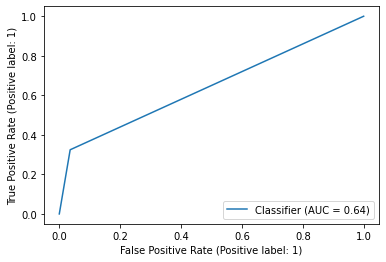

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_predictions(df['actual'], df['pred'])
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


print('AUC: ',roc_auc_score(df['actual'], df['pred']))
print('Accuracy: ',accuracy_score(df['actual'], df['pred']))
print('f1: ',f1_score(df['actual'], df['pred']))


AUC:  0.644396270518271
Accuracy:  0.9086746987951807
f1:  0.3817292006525286


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['actual'], df['pred'])

array([[7308,  271],
       [ 487,  234]])